In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

EXP_NAME = "logs/clients"
RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'start_transfer', 'download','status','download_size']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients():
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]    
    proxy_data = pd.read_csv(os.path.join('clients.csv'),sep=',')
    #Load results from each node
    nodes_results = None
    for sub_dir in dirs:
        client_nodes = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir) if os.path.isdir(os.path.join(INPUT_DIR+'/'+sub_dir, f))]
        #print(client_nodes)
        for node in client_nodes:
            tunnel_nodes = os.listdir(INPUT_DIR+'/'+sub_dir+'/'+node)
            for tunnel in tunnel_nodes:                
                file = os.path.join(INPUT_DIR+'/'+sub_dir+'/'+node,tunnel)             
                
                
                temp_filter = proxy_data.loc[(proxy_data['proxy'] == int(tunnel)) & (proxy_data['client'] == int(sub_dir))]
                try:
                    temp = pd.read_csv(file,sep=',', header = None)
                    temp.columns = headers
                    temp = temp.query('status == 200 & download_size >0')
                    #temp = temp.set_index(pd.DatetimeIndex(temp.time))
                    temp['proxy'] = tunnel
                    temp['client'] = sub_dir
                    temp['distance'] = temp_filter.distance.iloc[0]
                    temp['hops'] = temp_filter.hops.iloc[0]
                    temp['download_time'] = temp['download'] - temp['start_transfer']
                                                           
                    nodes_results = pd.concat([nodes_results, temp])
                except Exception as e:
                    print(node, 'EXception', e)
    return nodes_results

client_data = read_clients()

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

[ 65.8   72.5   68.89  72.8    0.1 ]


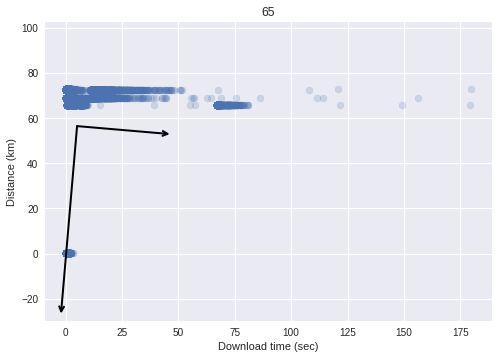

[ 66.1  75.1  70.   73.2   1.7]


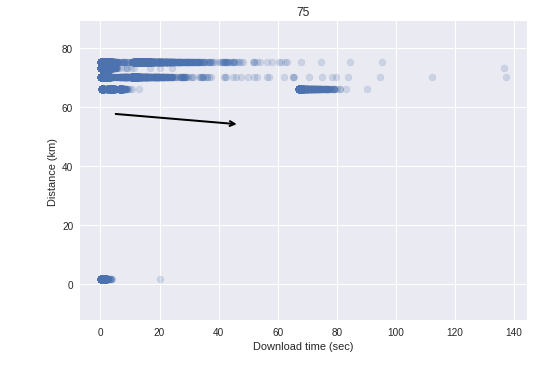

[ 62.5   71.9   67.78  70.3    7.5 ]


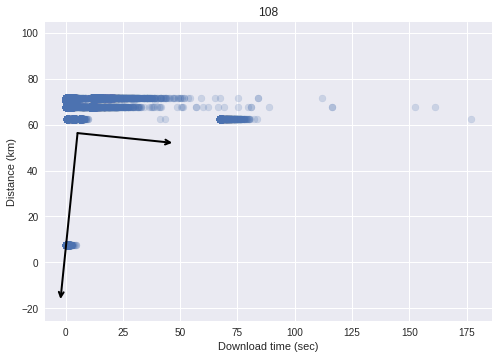

[ 67.7   77.3   71.16  74.9    3.3 ]


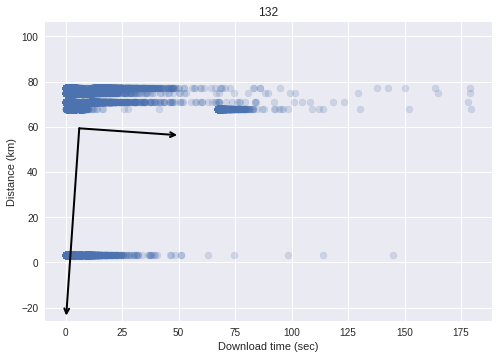

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def plot_pca(df_clients ):
    clients = df_clients.client.unique()
    for client in clients:
        df = df_clients.query('client == "'+client+'"')
        print(df.distance.unique())
        features = ['download_time', 'distance']
        x = df.loc[:, features]        
        pca = PCA(n_components=2)
        pca.fit(x)

        plt.scatter(x.download_time, x.distance, alpha=0.2)
        for length, vector in zip(pca.explained_variance_, pca.components_):
            v = vector * 3 * np.sqrt(length)
            draw_vector(pca.mean_, pca.mean_ + v)
        plt.axis('equal')
        plt.title(client)
        plt.xlabel('Download time (sec)')
        plt.ylabel('Distance (km)')
        plt.show()
       
    

plot_pca(client_data)
   

/home/khulan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[ 0.125     0.561795  0.561998 ...,  7.879417  8.968057  2.434777]
[ 0.125     0.561795  0.561998 ...,  7.879417  8.968057  2.434777]


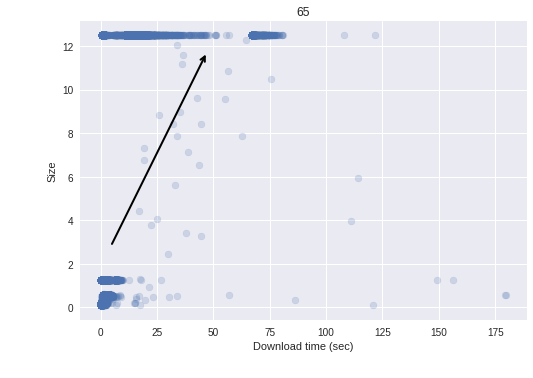

[  0.125      0.487304   0.456535 ...,   6.813817  12.066937   0.225017]
[  0.125      0.487304   0.456535 ...,   6.813817  12.066937   0.225017]


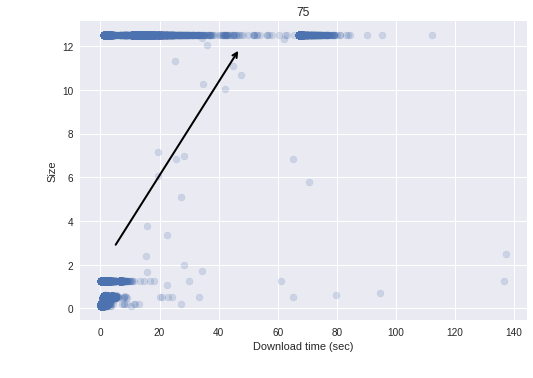

[ 0.125     0.452104  0.487185 ...,  0.613177  0.581497  1.216138]
[ 0.125     0.452104  0.487185 ...,  0.613177  0.581497  1.216138]


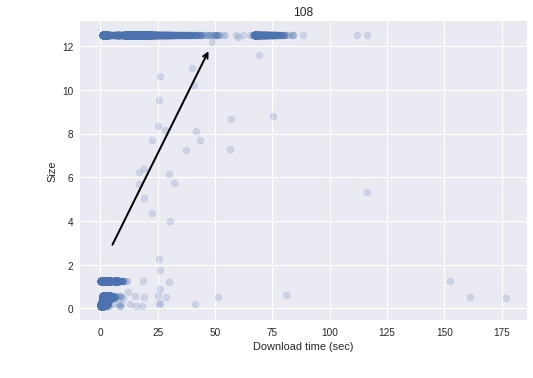

[ 0.125     0.571531  0.510805 ...,  9.514634  2.100874  1.835786]
[ 0.125     0.571531  0.510805 ...,  9.514634  2.100874  1.835786]


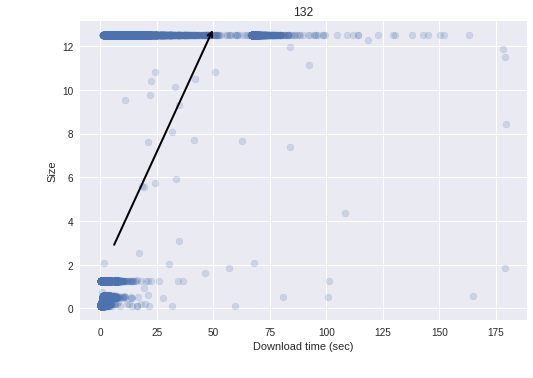

In [14]:
def plot_pca_size(df_clients):
    clients = df_clients.client.unique()
    #clients['size'] = clients['size']/1000000
    for client in clients:
                
        df = df_clients.query('client == "'+client+'"')
        df.download_size = df.download_size/1000000
        
        print(df['download_size'].unique())
        features = ['download_time', 'download_size']
        x = df.loc[:, features]
        
        print(x['download_size'].unique())
        pca = PCA(n_components=2)
        pca.fit(x)

        plt.scatter(x.download_time, x['download_size'], alpha=0.2)
        for length, vector in zip(pca.explained_variance_, pca.components_):
            v = vector * 3 * np.sqrt(length)
            draw_vector(pca.mean_, pca.mean_ + v)
        #lt.axis('equal')
        plt.title(client)
        plt.xlabel('Download time (sec)')
        plt.ylabel('Size')
        plt.show()
       
    

plot_pca_size(client_data)
   

[ 0.125     0.561795  0.561998 ...,  9.514634  2.100874  1.835786]


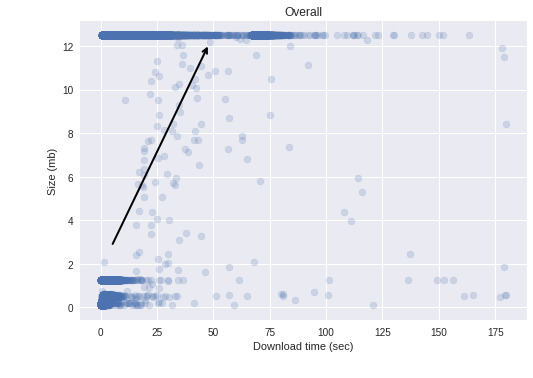

In [48]:
def plot_pca_proxy_distance(df ):
    #proxies = df_clients.proxy.unique()
    #for proxy in proxies:
        #df = df_clients.query('proxy == "'+proxy+'"')
    features = ['download_time', 'distance']
    x = df.loc[:, features]        
    pca = PCA(n_components=2)
    pca.fit(x)

    plt.scatter(x.download_time, x.distance, alpha=0.2)
    
    print(pca.explained_variance_)
    print(pca.components_)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)
    #plt.title(proxy)
    plt.xlabel('Download time (sec)')
    plt.ylabel('Distance (km)')
    plt.show()
        
def plot_pca_proxy_size(df):
    #proxies = df_clients.proxy.unique()
    #for proxy in proxies:
        #df = df_clients.query('proxy == "'+proxy+'"')
    df.download_size = df.download_size/1000000
    features = ['download_time', 'download_size']
    x = df.loc[:, features]
    print((df.download_size.unique()))
    pca = PCA(n_components=2)
    pca.fit(x)

    plt.scatter(x.download_time, x.download_size, alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)
    plt.title('Overall')
    plt.xlabel('Download time (sec)')
    plt.ylabel('Size (mb)')
    plt.show()

plot_pca_proxy_size(client_data)

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


65 : 5126 : 299597.819887
65 : 10473 : 1167567.07883
65 : 11252 : 2631961.27437
65 : 7193 : 27958889.2492
65 : 57064 : 29377203.2902


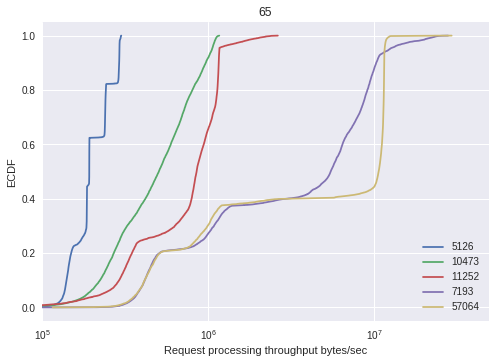

75 : 5126 : 304136.253041
75 : 10473 : 1164849.50144
75 : 11252 : 2670940.17094
75 : 7193 : 11190689.3465
75 : 57064 : 11013215.859


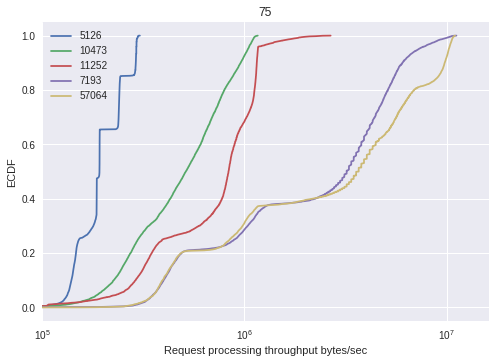

108 : 5126 : 298235.400781
108 : 10473 : 1162118.83083
108 : 11252 : 2715083.48339
108 : 7193 : 12204719.0278
108 : 57064 : 11495838.5065


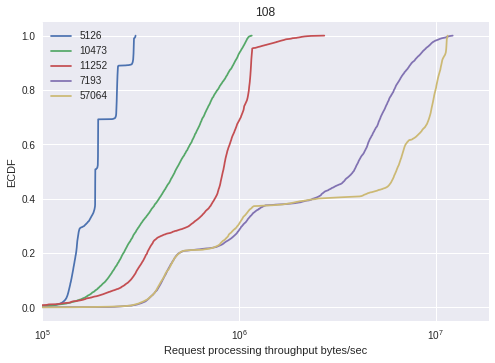

132 : 5126 : 320512.820513
132 : 10473 : 1107959.58163
132 : 11252 : 2566735.11294
132 : 7193 : 9218289.08555
132 : 57064 : 9630200.30817


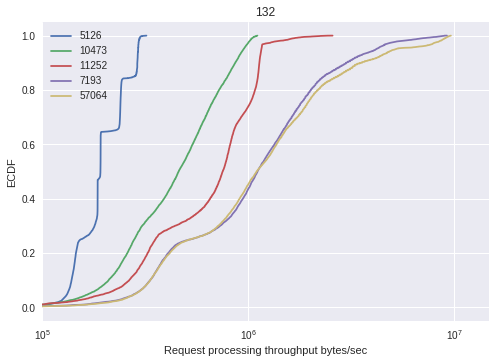

In [19]:
def getECDF(df, var):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[var].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()
    return ecdf

def plot_bytes_per_second(df_clients,var):    
    clients = df_clients.client.unique()
    for client in clients:                
        df = df_clients.query('client == "'+client+'"')
        proxies = df.proxy.unique()
        #print((df['download_size']/df['download_time']))
        df['bytes_second'] = (df['download_size']/df['download_time'])
        labels = []
        for proxy in proxies:
            df_proxy = df.query('proxy == "'+proxy+'"')            
            labels.append(proxy)
            ecdf = getECDF(df_proxy, 'bytes_second')
            ecdf.plot(logx=True)
            print(client,":",proxy,":",df_proxy.bytes_second.max())
        plt.legend(labels)
        plt.title(client)
        plt.ylabel('ECDF')
        plt.xlabel('Request processing throughput bytes/sec')
        plt.xlim(100000)
        plt.show()

plot_bytes_per_second(client_data,'download_size')